In [1]:
# !pip install xlrd
# !pip install openpyxl
# !pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd
 
loc = (r"SummOffX.xlsx")
# /Users/lnunezal/Desktop
 
wb = pd.read_excel(loc,sheet_name='GRAPHS2',header=0)
TlamX=wb["TlamX"]
TstressX=wb["TstressX"]
GlowX=wb["GlowX"]
GhighX=wb["GhighX"]
TlamY=wb["TlamY"]
TstressY=wb["TstressY"]
GlowY=wb["GlowY"]
GhighY=wb["GhighY"]
#print(type(wb))
#print(wb)
print(TlamX.loc[0])
print(TstressX.loc[0])

# wb=pd.read_csv('GRAPHS.csv',*, sep=' ')
# print(wb.TlamX)

1.02248222
0.00727


In [6]:
GlowX=wb["GlowX"]
GlowY=wb["GlowY"]
GhighX=wb["GhighX"]
GhighY=wb["GhighY"]
TlamX=wb["TlamX"]
TlamY=wb["TlamY"]
TstressX=wb["TstressX"]
TstressY=wb["TstressY"]

print(TlamX.loc[20])

1.0241491


In [7]:
def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

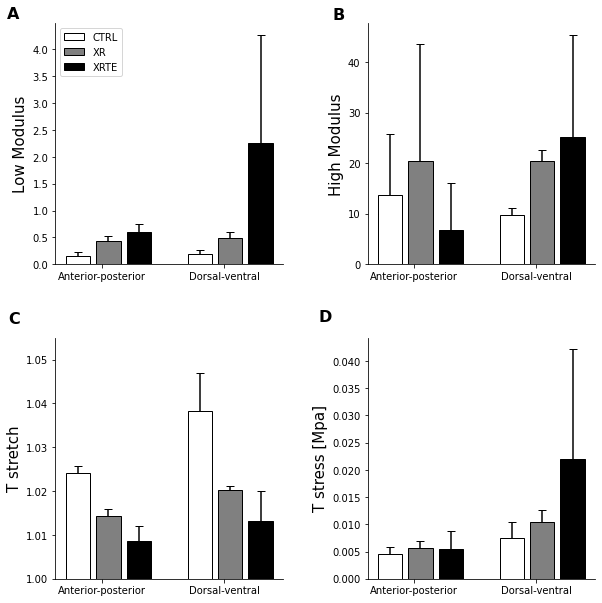

In [13]:

    
# set width of bar
# fig,axx = plt.subplots(2,2,figsize =(12, 15))

import string

# set width of bar
barWidth = 0.20
fig,axx = plt.subplots(2,2,figsize =(9,9))
 
# set height of bar
##Glow mean and error

# S
spacebars=0.25

# Set position of bar on X axis
br11 = np.arange(len(CTRLglX))
br22 = [x + spacebars for x in br11]
br33 = [x + spacebars for x in br22]
# br44 = [x + barWidth for x in br33]
 
# Make the plot
PP11=axx[0,0].bar(br11, CTRLglX, color ='1', width = barWidth, edgecolor ='0',
                yerr = ([0,0],CTRLeglX),capsize=4,ecolor='0', label ='CTRL')
PP12=axx[0,0].bar(br22, APEXglx, color ='0.5', width = barWidth, edgecolor ='0',
                yerr = ([0,0],APEXeglX),capsize=4,ecolor='0', label ='XR')
# PP13=axx[0,0].bar(br33, TEglX, color ='b', width = barWidth, edgecolor ='0',
#                yerr = ([0,0],TEeglX),capsize=4,ecolor='0', label ='TE')
PP14=axx[0,0].bar(br33, XRTEglX, color ='0', width = barWidth, edgecolor ='0',
                yerr = ([0,0],XRTEeglX),capsize=4,ecolor='0', label ='XRTE')

# barplot_annotate_brackets(0, 1, .1, bars, heights)
# barplot_annotate_brackets(1, 2, .001, bars, heights)
# barplot_annotate_brackets(0, 2, 'p < 0.0075', bars, heights, dh=.2)

PP21=axx[0,1].bar(br11, CTRLTs2, color ='1', width = barWidth, edgecolor ='0',
                yerr = ([0,0],CTRLeghX),capsize=4,ecolor='0',label ='CTRL')
pp22=axx[0,1].bar(br22, XRTs2, color ='0.5', width = barWidth, edgecolor ='0', 
                yerr = ([0,0],XReghX),capsize=4,ecolor='0',label ='XR')
# pp23=axx[0,1].bar(br33, TEghX, color ='b', width = barWidth, edgecolor ='0',
#                yerr = ([0,0],TEeghX),capsize=4,ecolor='0',label ='TE')
pp24=axx[0,1].bar(br33, XRTEghX, color ='0', width = barWidth, edgecolor ='0',
                yerr = ([0,0],XRTEeghX),capsize=4,ecolor='0',label ='XRTE')

PP31=axx[1,0].bar(br11, CTRLTlX, color ='1', width = barWidth,edgecolor ='0',
                yerr = ([0,0],CTRLeTlX),capsize=4,ecolor='0',label ='CTRL')
pp32=axx[1,0].bar(br22, XRTlX, color ='0.5', width = barWidth,edgecolor ='0',
                yerr = ([0,0],XReTlX),capsize=4,ecolor='0',label ='XR')
# pp33=axx[1,0].bar(br33, TETlX, color ='b', width = barWidth, edgecolor ='0',
#                yerr = ([0,0],TEeTlX),capsize=4,ecolor='0',label ='TE')
pp34=axx[1,0].bar(br33, XRTETlX, color ='0', width = barWidth, edgecolor ='0',
                yerr = ([0,0],XRTEeTlX),capsize=4,ecolor='0',label ='XRTE')

PP41=axx[1,1].bar(br11, CTRLTs, color ='1', width = barWidth, edgecolor ='0',
                yerr = ([0,0],CTRLeTs),capsize=4,ecolor='0',label ='CTRL')
pp42=axx[1,1].bar(br22, XRTs, color ='0.5', width = barWidth, edgecolor ='0',
                yerr = ([0,0],XReTs),capsize=4,ecolor='0',label ='XR')
# pp43=axx[1,1].bar(br33, TETs, color ='b', width = barWidth, edgecolor ='0',
#                yerr = ([0,0],TEeTs),capsize=4,ecolor='0',label ='TE')
pp44=axx[1,1].bar(br33, XRTETs, color ='0', width = barWidth, edgecolor ='0',
                yerr = ([0,0],XRTEeTs),capsize=4,ecolor='0',label ='XRTE')

# Eliminate borders
for i in [0,1]:
    for j in [0,1]:
        axx[i,j].spines['right'].set_visible(False)
        axx[i,j].spines['top'].set_visible(False)
        #axx[0,j].get_xaxis().set_visible(False)
        axx[i,j].set_xticks([0.20, 1.20],['Anterior-posterior', 'Dorsal-ventral'], fontsize=10)

#axx[0,1].set_xticks([0.20, 1.20], ['2015', '2016'])


# Adding Xticks
axx[0,0].set_ylabel('Low Modulus', fontsize = 15)
axx[0,1].set_ylabel('High Modulus', fontsize = 15)
axx[1,0].set_ylabel('T stretch', fontsize = 15)
axx[1,0].set_ylim(1.000,1.055)
axx[1,1].set_ylabel('T stress [Mpa]', fontsize = 15)

axx[0,0].text(-0.48, 4.8, 'A', fontsize=16, fontweight='bold', 
             va='top', ha='right')
axx[0,1].text(-0.37, 50.8, 'B', fontsize=16, fontweight='bold', 
             va='top', ha='right')
axx[1,0].text(-0.48, 1.061, 'C', fontsize=16, fontweight='bold', 
             va='top', ha='right')
axx[1,1].text(-0.48, 0.0495, 'D', fontsize=16, fontweight='bold', 
             va='top', ha='right')

axx[0,0].legend()
fig.tight_layout(pad=3.0)
# plt.savefig("TransParam2_WTE2.png",dpi=300)


plt.show()


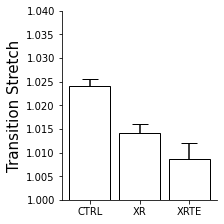

In [10]:
barWidth1 = 0.050
locspace1=0.06

br1 = [0]
# np.arange(len(CTRLglX))
br2 = [x + locspace1 for x in br1]
br3 = [x + locspace1 for x in br2]
br4 = [x + locspace1 for x in br3]

fig,axx = plt.subplots(1,1,figsize = (3, 3), 
                      constrained_layout=True
                     )

plt.bar(br1, [CTRLTlX[0]], color ='1', width = barWidth1,edgecolor ='0',
                yerr = ([0],[CTRLeTlX[0]]),capsize=8,ecolor='0',label ='CTRL')
plt.bar(br2, [XRTlX[0]], color ='1', width = barWidth1,edgecolor ='0',
                yerr = ([0],[XReTlX[0]]),capsize=8,ecolor='0',label ='XR')
plt.bar(br3, [XRTETlX[0]], color ='1', width = barWidth1, edgecolor ='0',
                yerr = ([0],[XRTEeTlX[0]]),capsize=8,ecolor='0',label ='XRTE')

axx = plt.gca()
# ax.legend(loc=1, fontsize=12)
axx.spines['right'].set_visible(False)
axx.spines['top'].set_visible(False)
# ax.get_xaxis().set_visible(False)
axx.set_ylim(1.000,1.04)
axx.set_xticks([br1[0],br2[0],br3[0]],['CTRL','XR','XRTE'], fontsize=10)
axx.set_ylabel('Transition Stretch', fontsize = 15)

plt.savefig("TstretchAntPost.png",dpi=300)



In [11]:
CTRLglX

[0.15424207, 0.20105465]

In [ ]:
CTRLTlX[0]

In [ ]:
CTRLTlX

In [ ]:
CTRLeTlX